# Apresentação:

    4º Laboratório, parte prática, do curso de Análise de Regressão, do
    curso de Estatística do Instituto de Matemática da UFRJ.

# Questão 1:

    O preço médio (em centavos) de alguns alimentos foi registrado para
    dois anos consecutivos na Grã-Bretanha.

In [1]:
# Vetor alimentos:
alimento = c("peixe",
"leite",
"queijo",
"pão",
"cereal",
"batata",
"maçã",
"ervilha",
"carne bovina",
"margarina")

# preços em 1987
x = c(856, 496, 663, 478, 753, 659, 685, 750, 823, 407)
# preco em 1988
y = c(943, 516, 732, 511, 802, 617, 711, 891, 896, 427)

# Conscruindo DataFrame:
df1 = data.frame(alimento,x,y)

# Alterando nomes:
colnames(df1)[2:3] = c("preço_87", "preço_88")

# Mostrando tabela:
knitr::kable(df1)



|alimento     | preço_87| preço_88|
|:------------|--------:|--------:|
|peixe        |      856|      943|
|leite        |      496|      516|
|queijo       |      663|      732|
|pão          |      478|      511|
|cereal       |      753|      802|
|batata       |      659|      617|
|maçã         |      685|      711|
|ervilha      |      750|      891|
|carne bovina |      823|      896|
|margarina    |      407|      427|

**Análise Exploratória de Dados**

Antes de qualquer coisa, é interessante realizar uma



# Questão 2:

Os dados abaixo se referem ao tamanho do motor e o aproveitamento de gasolina para 12 carros.

In [2]:
# Veículo:
carro = c("Apolo",
"Nova",
"Omega",
"Granada",
"Cougar",
"Camaro",
"Valiante",
"Pacer",
"Capri",
"Astre",
"Corolla")

# Tamanho do motor:
x = c(350.0, 250.0, 351.0, 302.0, 360.0, 340.0, 318.0, 258.0, 171.0, 140.0, 96.9)

# Aproveitamento da gasolina:
y = c(18.90, 20.00, 17.00, 17.80, 13.90, 16.50, 16.41, 19.70, 21.50, 29.40, 30.40)

# Criando DataFrame:
df2 = data.frame(carro,x,y)

# Alterando nome das Colunas:
colnames(df2)[2:3] = c("tamanho_motor", "aproveitamento_gasolina")

# Printando DataFrame:
knitr::kable(df2)



|carro    | tamanho_motor| aproveitamento_gasolina|
|:--------|-------------:|-----------------------:|
|Apolo    |         350.0|                   18.90|
|Nova     |         250.0|                   20.00|
|Omega    |         351.0|                   17.00|
|Granada  |         302.0|                   17.80|
|Cougar   |         360.0|                   13.90|
|Camaro   |         340.0|                   16.50|
|Valiante |         318.0|                   16.41|
|Pacer    |         258.0|                   19.70|
|Capri    |         171.0|                   21.50|
|Astre    |         140.0|                   29.40|
|Corolla  |          96.9|                   30.40|

**Análise Exploratória**

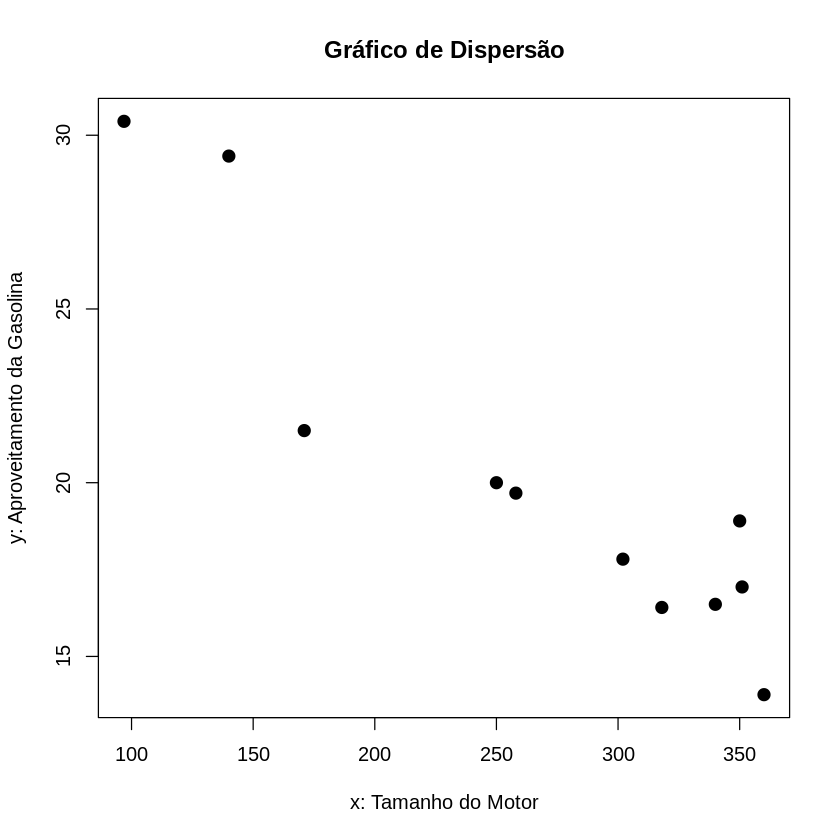

In [3]:
plot(x, y, pch = 20, cex = 2, xlab = 'x: Tamanho do Motor', ylab = 'y: Aproveitamento da Gasolina',main='Gráfico de Dispersão')

    Vemos que quanto maior o tamanho do motor, menor
    o aproveitamento do do veículo.

In [4]:
# Checando Correlação:
corr <- cor(x,y)
r2 <- corr**2

sprintf("Vemos uma correlação de %.2f, com r² igual a %.2f",corr,r2)

[1] "Vemos uma correlação de -0.93, com r² igual a 0.86"

Esse valor é considerado uma correlação linear forte, além disso, como é negativa, então significa que as
variáveis possuem correlação linear negativa: quanto maior x, menor y ou quanto menor x, maior y.

In [5]:
# Modelo de Regressão:
modelo2 = lm(y ~ x)

# Sumário do Modelo:
summary(modelo2)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6706 -1.0404 -0.5016  1.3059  3.1153 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.137054   1.979526  17.245 3.34e-08 ***
x           -0.052435   0.007037  -7.452 3.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.068 on 9 degrees of freedom
Multiple R-squared:  0.8605,	Adjusted R-squared:  0.845 
F-statistic: 55.53 on 1 and 9 DF,  p-value: 3.885e-05


Veja que as estimativas pontuais dos coeficientes são
* $\hat\beta_0= 34.1370544$
* $\hat\beta_1-0.0524354$
Os p-valores são valores bem pequenos, indicando, que para um baixo nível de significância, rejeita-se as
hipóteses $\hat\beta_0=0$ e $\hat\beta_1=0$.

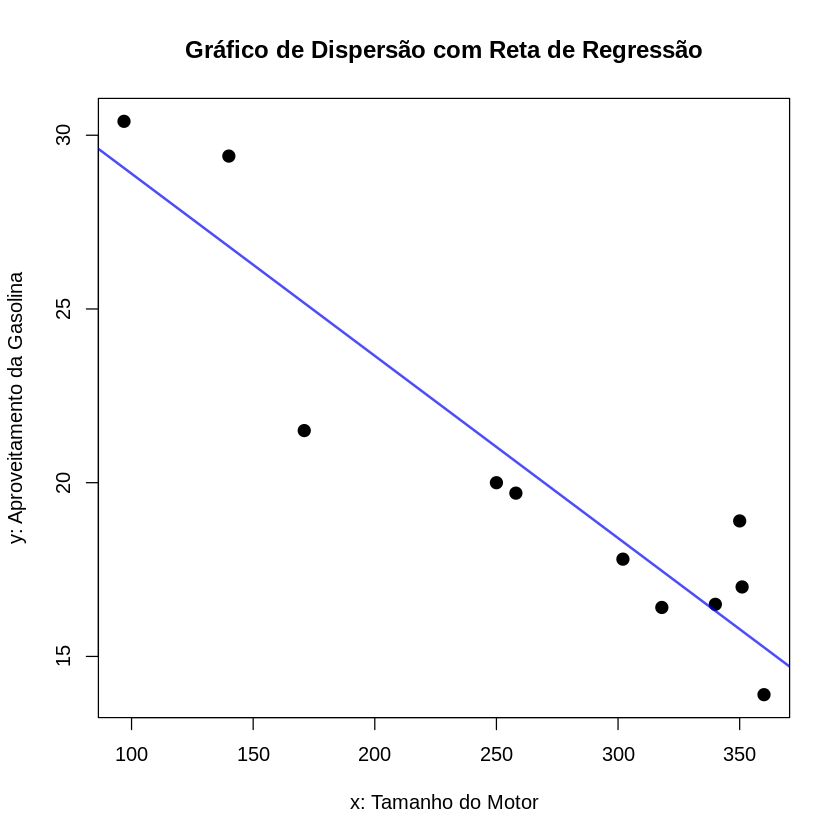

In [6]:
# Plotando gráfico de dispersão com a reta de regressão:
plot(x, y, pch = 20, cex = 2, xlab = 'x: Tamanho do Motor', ylab = 'y: Aproveitamento da Gasolina',main = 'Gráfico de Dispersão com Reta de Regressão')
abline(modelo2$coefficients, col = rgb(0,0,1,0.7), lwd = 2) # Reta de Regressão

(a) Construa a tabela de análise de variância para os dados.

In [7]:
# Análise Variânce do Modelo:
print(anova(modelo2))

Analysis of Variance Table

Response: y
          Df  Sum Sq Mean Sq F value    Pr(>F)    
x          1 237.549 237.549  55.528 3.885e-05 ***
Residuals  9  38.502   4.278                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


(b) Teste de hipótese de $\beta_1 = 0$ contra $\beta_1 \neq 0$ usando a tabela em (a). (Use $\alpha=0.05$)

O valor calculado de F é f0 = 55, 528 e implica no p-valor 0, 00003885, ou seja, o teste fornece bastante
evidência para rejeitarmos a hipótese β1 = 0, ou seja, há uma correlação linear entre as variáveis tamanho do
motor e aproveitamento da gasolina, estatisticamente significante.

Nota:
    
    Tentar refazer essa questão para deixar mais
    computacionalmente bem feito. Simplesmente
    copiar o que está no anova não é muito elegante.
    Deve ter alguma forma de tornar essa resposta
    mas interessante.

(c) Verifique que $t_0^2 = f_0$

In [8]:
t_0 = -7.452 # pvalue do teste de significancia de x;
f_0 = 55.528 # fvalue do modelo;

# Comparando o valor:
if (t_0^2 == f_0){
  print('De fato igualdade verificada, %.3f == %.3f', t_0^2,f_0)
}

In [9]:
t_0^2

[1] 55.5323